In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tkinter import filedialog as fd
fn = fd.askopenfilename()
values=pd.read_excel(fn, skiprows = 8, header=None) 
info = pd.read_excel(fn, skiprows = 7, header=None)

In [28]:
row1=np.array(list(range(27,32)))
row2=np.array(list(range(35,40)))
row3=np.array(list(range(43,48)))
row4=np.array(list(range(51,56)))
row5=np.array(list(range(59,64)))

In [29]:
cells1=np.concatenate([row1, row2, row3])
cells=np.concatenate([cells1, row4, row5])
regions=values.loc[:, cells]
clean = regions.loc[:, values.ne(0).all()]

In [30]:
import scipy
from scipy import signal

In [31]:
count=clean.shape[1]
n = 0
avearray=[]
while n < count+1: 
    cleancol = np.array(clean.iloc[:, n])
    peakloc, _ = scipy.signal.find_peaks(cleancol, height=None)
    avepeaks=np.mean(cleancol[peakloc])
    n+=1
    avearray.append(avepeaks)
    if n == count:
        break 

In [32]:
avearray2=np.array(avearray)
sortedpeakindex = np.argsort(avearray)
sortedpeaks = avearray2[sortedpeakindex]
n=4
toppeaks = sortedpeaks[-n :] 
topave = np.mean(toppeaks)

In [33]:
toppeaks = toppeaks[~pd.isnull(toppeaks)]

In [34]:
regions2 =info.loc[:, cells]
clean2 = regions2.loc[:, values.ne(0).all()]
highpress = np.array(clean2.iloc[0])

In [35]:
highpressname = highpress[sortedpeakindex]

Average of Highest Peaks
36.7118202888863
Cell Locations, Lowest to Highest Pressure
[ 951. 1014. 1015.  886. 1012.  983.  918.  917.  950.  981.  949.  982.]


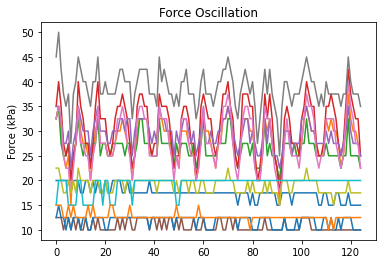

In [37]:
## data summary 
plt.plot(clean)
plt.ylabel('Force (kPa)')
plt.title('Force Oscillation')
print ('Average of Highest Peaks')
print(topave)
print ('Cell Locations, Lowest to Highest Pressure')
print (highpressname)